In [203]:
import numpy as np
import conductivity as sigma
from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import cm
import time as time

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.5)

figDirectory = "../figures/"
saveFigs = False


## Dependence of transport time on scattering range 

In [150]:
nbetas = 25
betas = np.linspace(0.,2.,nbetas)
gamma_trs = np.zeros_like(betas)
for i in range(nbetas):
    u = lambda x : sigma.u_exp(x,betas[i]**2)

    gamma_trs[i] = sigma.calc_tr(u)    

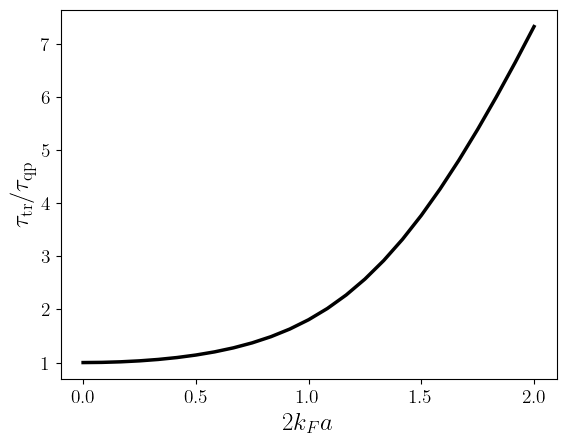

In [151]:
plt.plot(betas,1./gamma_trs,color='black')
plt.xlabel(r'$2k_F a$')
plt.ylabel(r'$\tau_{\rm tr}/\tau_{\rm qp}$')
#plt.yscale('log')
#plt.xscale('log')
if saveFigs: plt.savefig(figDirectory+"transport_time.pdf",bbox_inches='tight')
plt.show()

## Now we illustrate for a small value of beta (short range scattering)

In [248]:
beta = 0.2
u = lambda x : sigma.u_exp(x,beta**2)
nthetas = 100
thetas = np.linspace(0.,2.*np.pi,nthetas,endpoint=False)

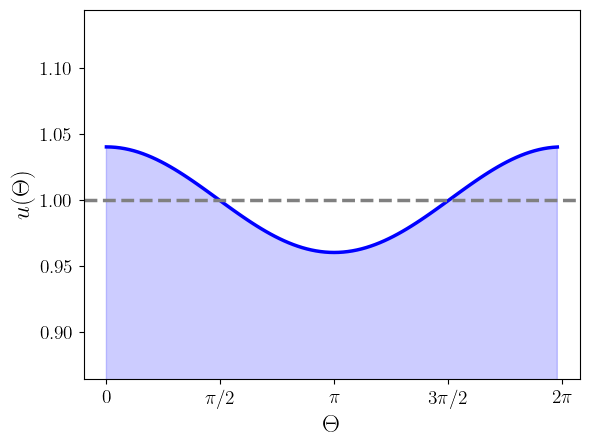

In [249]:
plt.plot(thetas,u(thetas),color='blue')
plt.axhline(1.,linestyle='dashed',color='gray')
plt.ylim(0.9*min(u(thetas)),1.1*max(u(thetas)))
plt.fill_between(thetas,u(thetas),alpha=0.2,color='blue')
plt.xlabel(r'$\Theta$')
plt.ylabel(r'$u(\Theta)$')
plt.xticks([0.,np.pi/2.,np.pi,3.*np.pi/2.,2.*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
if saveFigs: plt.savefig(figDirectory+"u_function_beta=0.2.pdf",bbox_inches='tight')
plt.show()

## For this value we now compute the conductivity

In [250]:
nws = 100
nqs = 100
ws = np.linspace(0.,5.,nws)
qxs = np.linspace(0.,5.,nqs)

sigmas = np.zeros((nws,nqs,2,2),dtype=complex)
for i in range(nws):
    for j in range(nqs):
        q = np.array([qxs[j],0.])
        sigmas[i,j,:,:] = sigma.conductivity(ws[i],q,u,nthetas)

In [251]:
gamma_tr =sigma.calc_tr(u)
print(gamma_tr)

0.9800039989336266


In [252]:
sigma_perps = sigmas[:,:,1,1] 

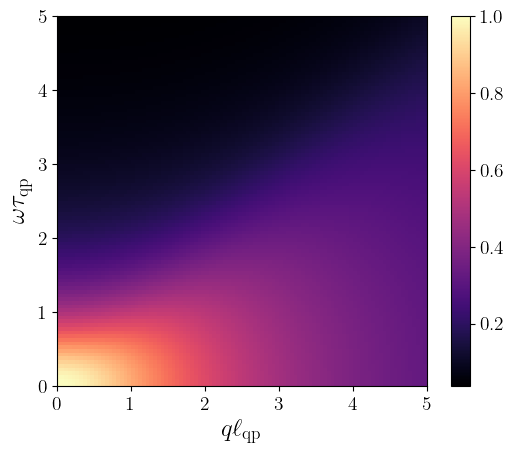

In [253]:
plt.imshow(np.real(sigma_perps),origin='lower',extent=[qxs[0],qxs[-1],ws[0],ws[-1]],cmap='magma')
plt.colorbar()
plt.xlabel(r'$q \ell_{\rm qp}$')
plt.ylabel(r'$\omega \tau_{\rm qp}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_beta=0.2.pdf",bbox_inches='tight')
plt.show()

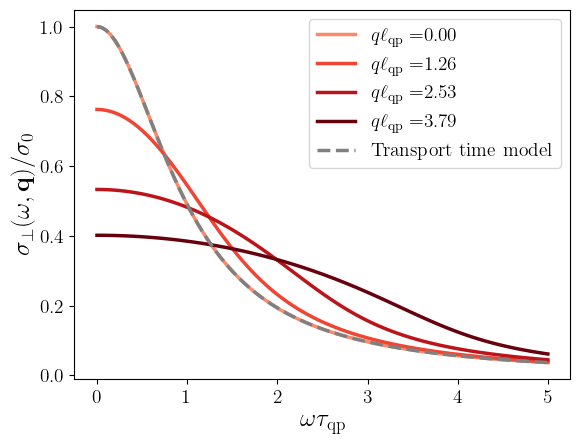

In [254]:
q_indices = [0,25,50,75]
q_clrs = cm.Reds(np.linspace(0.4,1.,len(q_indices)))
for i in range(len(q_indices)):
    
    plt.plot(ws,np.real(sigma_perps[:,q_indices[i]]),label=r'$q\ell_{\rm qp} = $'+"{q:0.2f}".format(q=qxs[q_indices[i]]),color=q_clrs[i])

plt.plot(ws,1./((ws/gamma_tr)**2+1.),color='gray',label=r'Transport time model',linestyle='dashed')
plt.xlabel(r'$\omega \tau_{\rm qp}$')
plt.legend()
plt.ylabel(r'$\sigma_\perp(\omega,\mathbf{q})/\sigma_{0}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_vs_w_beta=0.2.pdf",bbox_inches='tight')
plt.show()

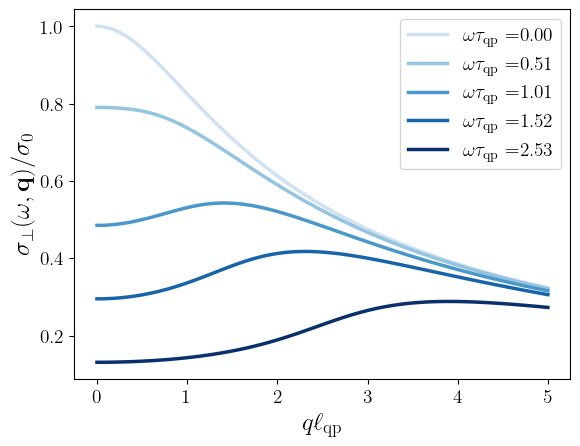

In [255]:
w_indices = [0,10,20,30,50]
w_clrs = cm.Blues(np.linspace(0.2,1.,len(w_indices)))
for i in range(len(w_indices)):
    plt.plot(qxs,np.real(sigma_perps[w_indices[i],:]),label=r'$\omega\tau_{\rm qp} = $'+"{w:0.2f}".format(w=ws[w_indices[i]]),color=w_clrs[i])

plt.xlabel(r'$q \ell_{\rm qp}$')
plt.legend()
plt.ylabel(r'$\sigma_\perp(\omega,\mathbf{q})/\sigma_{0}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_vs_q_beta=0.2.pdf",bbox_inches='tight')
plt.show()

## Now we work out for a larger scattering range

In [256]:
beta = 1.5
u = lambda x : sigma.u_exp(x,beta**2)
nthetas = 100
thetas = np.linspace(0.,2.*np.pi,nthetas,endpoint=False)

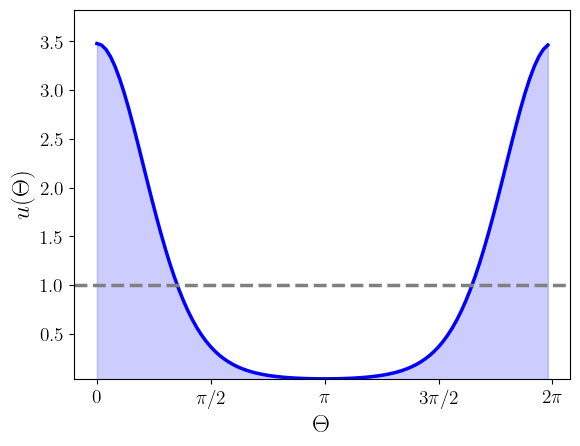

In [257]:
plt.plot(thetas,u(thetas),color='blue')
plt.axhline(1.,linestyle='dashed',color='gray')
plt.ylim(0.9*min(u(thetas)),1.1*max(u(thetas)))
plt.fill_between(thetas,u(thetas),alpha=0.2,color='blue')
plt.xlabel(r'$\Theta$')
plt.ylabel(r'$u(\Theta)$')
plt.xticks([0.,np.pi/2.,np.pi,3.*np.pi/2.,2.*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
if saveFigs: plt.savefig(figDirectory+"u_function_beta=1.5.pdf",bbox_inches='tight')
plt.show()

## For this value we now compute the conductivity

In [258]:
nws = 100
nqs = 100
ws = np.linspace(0.,5.,nws)
qxs = np.linspace(0.,5.,nqs)

sigmas = np.zeros((nws,nqs,2,2),dtype=complex)
for i in range(nws):
    for j in range(nqs):
        q = np.array([qxs[j],0.])
        sigmas[i,j,:,:] = sigma.conductivity(ws[i],q,u,nthetas)

In [259]:
gamma_tr =sigma.calc_tr(u)
print(gamma_tr)

0.26515954762079796


In [260]:
sigma_perps = sigmas[:,:,1,1] 

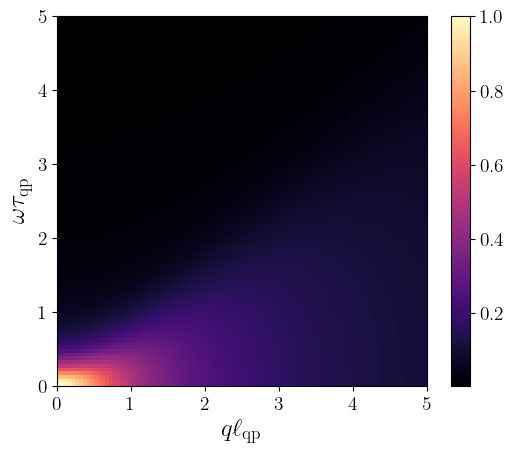

In [261]:
plt.imshow(np.real(sigma_perps),origin='lower',extent=[qxs[0],qxs[-1],ws[0],ws[-1]],cmap='magma')
plt.colorbar()
plt.xlabel(r'$q \ell_{\rm qp}$')
plt.ylabel(r'$\omega \tau_{\rm qp}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_beta=1.5.pdf",bbox_inches='tight')
plt.show()

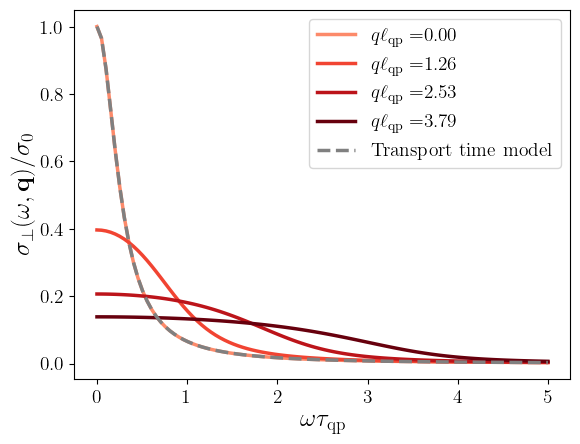

In [262]:
q_indices = [0,25,50,75]
q_clrs = cm.Reds(np.linspace(0.4,1.,len(q_indices)))
for i in range(len(q_indices)):
    
    plt.plot(ws,np.real(sigma_perps[:,q_indices[i]]),label=r'$q\ell_{\rm qp} = $'+"{q:0.2f}".format(q=qxs[q_indices[i]]),color=q_clrs[i])

plt.plot(ws,1./((ws/gamma_tr)**2+1.),color='gray',label=r'Transport time model',linestyle='dashed')
plt.xlabel(r'$\omega \tau_{\rm qp}$')
plt.legend()
plt.ylabel(r'$\sigma_\perp(\omega,\mathbf{q})/\sigma_{0}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_vs_w_beta=1.5.pdf",bbox_inches='tight')
plt.show()

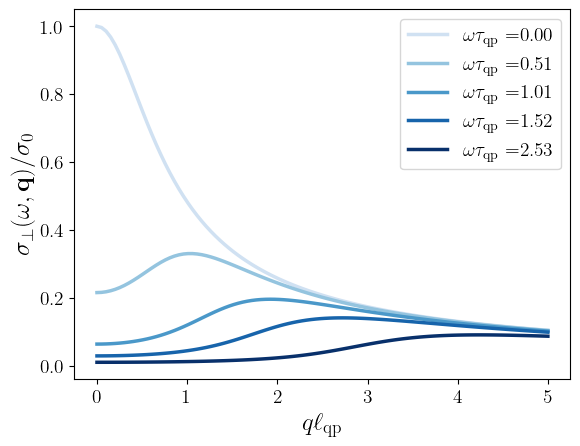

In [263]:
w_indices = [0,10,20,30,50]
w_clrs = cm.Blues(np.linspace(0.2,1.,len(w_indices)))
for i in range(len(w_indices)):
    plt.plot(qxs,np.real(sigma_perps[w_indices[i],:]),label=r'$\omega\tau_{\rm qp} = $'+"{w:0.2f}".format(w=ws[w_indices[i]]),color=w_clrs[i])

plt.xlabel(r'$q \ell_{\rm qp}$')
plt.legend()
plt.ylabel(r'$\sigma_\perp(\omega,\mathbf{q})/\sigma_{0}$')
if saveFigs: plt.savefig(figDirectory+"sigma_perp_vs_q_beta=1.5.pdf",bbox_inches='tight')
plt.show()

## Flux noise

In [176]:
betas = np.array([0.3,1.,2.])
nbetas = len(betas)
alpha_trs = np.zeros_like(betas)
for i in range(len(betas)):
    u = lambda x : sigma.u_exp(x,betas[i]**2)
    alpha_trs[i] = sigma.calc_tr(u)
print(alpha_trs)


[0.9550455  0.55361003 0.13647739]


In [177]:
T = 0.01 

nws = 10
nzs = 50

ws = np.array([0.3,1.,3.]) ### Measured in units of qp time which is independent of scattering length
nws = len(ws)

zs = np.logspace(-2,1,nzs) ### Measured in units of qp length which is independent of scattering length 
nzs = len(zs)

times = np.zeros_like(betas)
noises = np.zeros((len(betas),nzs,nws))


In [178]:
for i in range(nbetas):
    u = lambda x : sigma.u_exp(x,betas[i]**2)
    t0 = time.time()
    noise = sigma.flux_noise(ws*alpha_trs[i],zs*alpha_trs[i],T,u,nqs = 4000,qmax=100.)
    t1 = time.time()
    times[i] = t1 - t0
    print(t1-t0,"s")
    noises[i,:,:] = noise
    

28.936005115509033 s
129.03791689872742 s
277.1532881259918 s


In [179]:
print(times)

[ 28.93600512 129.0379169  277.15328813]


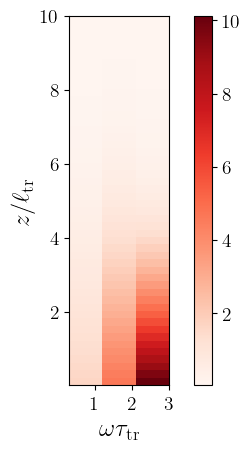

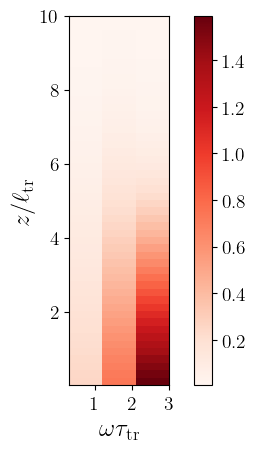

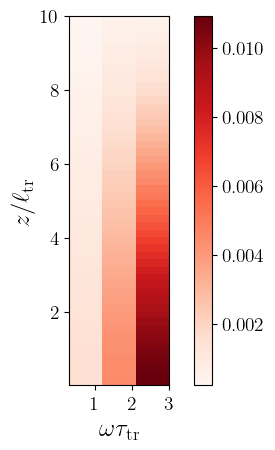

In [180]:
for i in range(nbetas):
    plt.imshow(noises[i,:,:],origin='lower',cmap='Reds',extent=[ws[0],ws[-1],zs[0],zs[-1]])
    plt.colorbar()
    plt.xlabel(r'$\omega \tau_{\rm tr}$')
    plt.ylabel(r'$z/\ell_{\rm tr}$')
    plt.show()

python(28538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


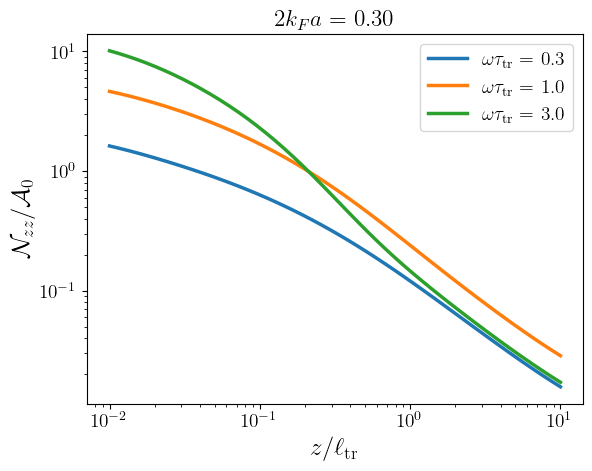

python(28559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


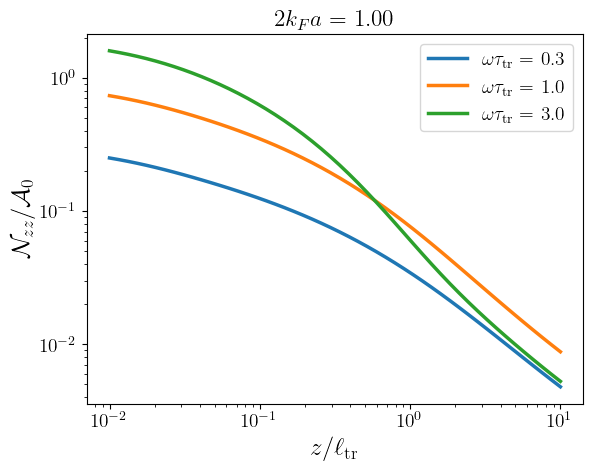

python(28563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


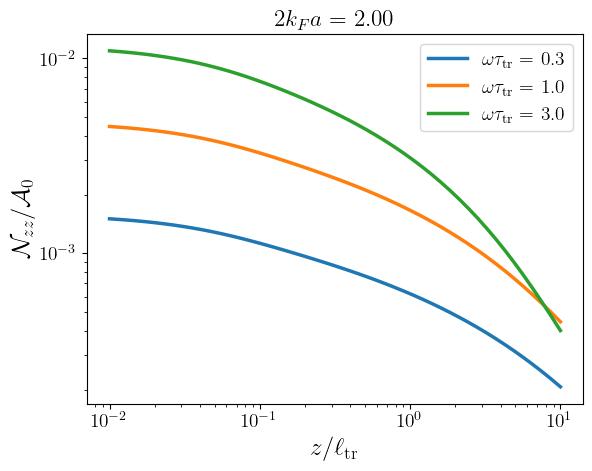

In [183]:
plt_indices = [0,1,2]

for j in range(len(betas)):
    for i in plt_indices:
        plt.plot(zs,noises[j,:,i],label=r'$\omega \tau_{\rm tr}= $'+" {w:0.1f}".format(w=ws[i]) )
        
    plt.xlabel(r'$z/\ell_{\rm tr}$')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{A}_0$')
    plt.title(r'$2k_Fa = $'+" {b:0.2f}".format(b=betas[j]) )
    if saveFigs: plt.savefig(figDirectory+"Noise_vs_z_beta={b:0.2f}.pdf".format(b=betas[j]),bbox_inches='tight')
    plt.show()

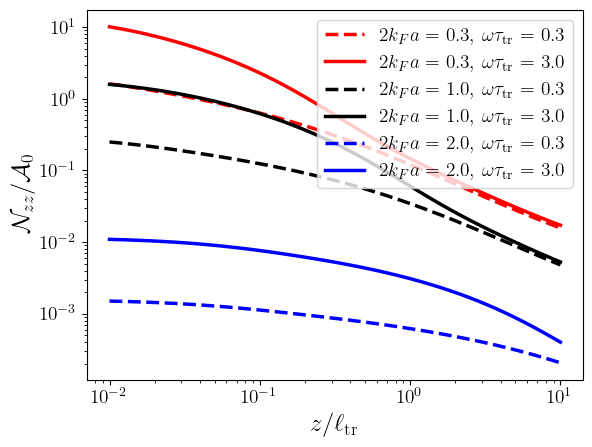

In [202]:
w_indices = [0,2]
wstyle=['dashed','solid']
beta_color=['red','black','blue']

for i in range(len(betas)):
    for j in range(len(w_indices)):
        windx = w_indices[j]

        plotlabel = r'$2k_F a= $ {b:0.1f}, '.format(b=betas[i])+ r'$\omega\tau_{\rm tr}=$'+" {w:0.1f}".format(w=ws[windx])
        
        plt.plot(zs,noises[i,:,windx],label=plotlabel,linestyle=wstyle[j],color=beta_color[i] )
        
    plt.xlabel(r'$z/\ell_{\rm tr}$')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{A}_0$')
    
if saveFigs: plt.savefig(figDirectory+"Noise_vs_z_ws_betas.pdf".format(w=ws[windx]),bbox_inches='tight')
plt.show()

In [204]:
T = 0.01 

nws = 30
nzs = 10

ws = np.logspace(-2,2,nws) ### Measured in units of qp time which is independent of scattering length
nws = len(ws)

zs = np.array([.1,1.,10.]) ### Measured in units of qp length which is independent of scattering length 
nzs = len(zs)

times = np.zeros_like(betas)
noises = np.zeros((len(betas),nzs,nws))


In [205]:
for i in range(nbetas):
    u = lambda x : sigma.u_exp(x,betas[i]**2)
    t0 = time.time()
    noise = sigma.flux_noise(ws*alpha_trs[i],zs*alpha_trs[i],T,u,nqs = 4000,qmax=100.)
    t1 = time.time()
    times[i] = t1 - t0
    print(t1-t0,"s")
    noises[i,:,:] = noise
    

521.1510488986969 s
1966.5389630794525 s
3683.066554784775 s


python(73421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


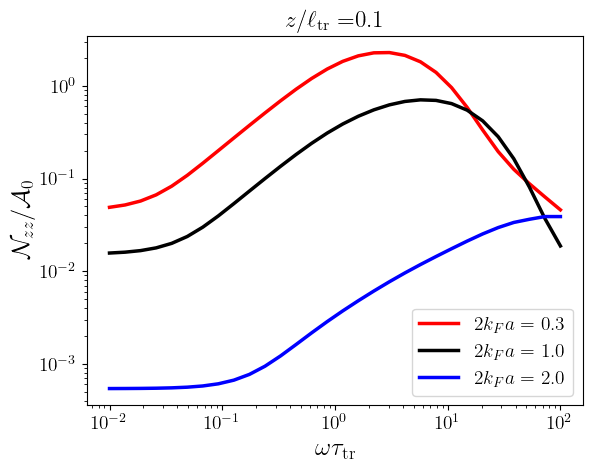

python(73423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


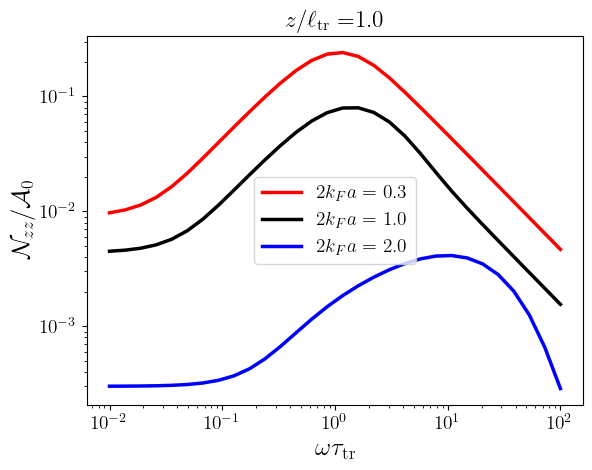

python(73425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


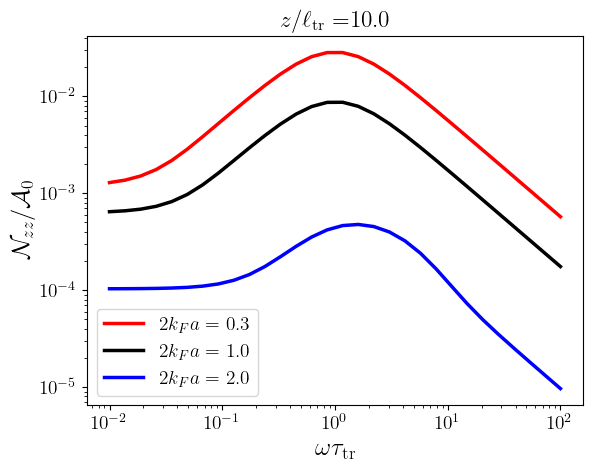

In [217]:
z_indices = [0,1,2]
beta_color=['red','black','blue']

for j in range(len(z_indices)):
    for i in range(len(betas)):
        zindx = z_indices[j]        
        plt.plot(ws,noises[i,zindx,:],label=r'$2k_F a = $'+" {b:0.1f}".format(b=betas[i]),color=beta_color[i] )
        
    plt.xlabel(r'$\omega \tau_{\rm tr}$')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\mathcal{N}_{zz}/\mathcal{A}_0$')
    plt.title(r'$z/\ell_{\rm tr} =$'+"{z:0.1f}".format(z=zs[zindx]) )
    if saveFigs: plt.savefig(figDirectory+"Noise_vs_w_z={z:0.2f}.pdf".format(z=zs[zindx]),bbox_inches='tight')
    plt.show()